## Setup

In [1]:
from pathlib import Path
import os
import matplotlib.pyplot as plt

In [2]:
IMAGE_PATH = Path()/'images'/"training_linear_models"
os.makedirs(IMAGE_PATH, exist_ok=True)

In [3]:
def save_fig(fig_name, file_extension='png', resolution=300,tight_layout=True):
    file = IMAGE_PATH / f"{fig_name}.{file_extension}"
    print(f"Saving {fig_name}...")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(file, dpi=resolution, format = file_extension )
    
    

## Linear Regression

### The Normal Equation 

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
np.random.seed(42)
m=100
X = 2 * np.random.rand(m,1)
y = 4 + 3*X + np.random.rand(m,1)


Saving generated_data_plot...


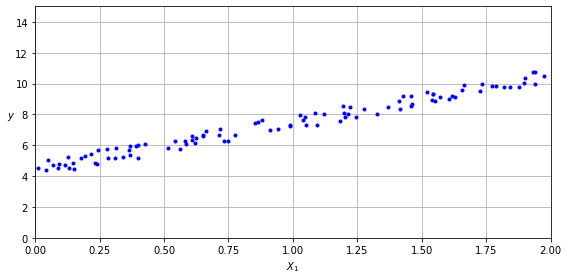

In [6]:
plt.figure(figsize=(8,4))
plt.plot(X,y,"b.")
plt.xlabel("$X_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2,0, 15])
plt.grid()
save_fig("generated_data_plot")
plt.show()

In [7]:
# add X0=1 to each instance
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.51359766],
       [2.98323418]])

In [8]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.51359766],
       [2.98323418]])

In [9]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b.dot(theta_best)
y_predict, X_new_b@theta_best

(array([[ 4.51359766],
        [10.48006601]]),
 array([[ 4.51359766],
        [10.48006601]]))

Saving linear_regression_prediction...


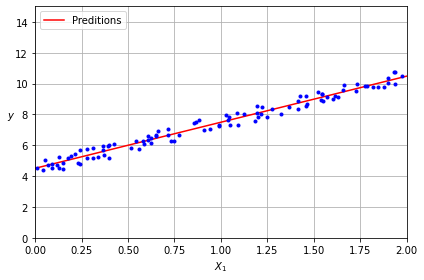

In [10]:
plt.plot(X_new, y_predict, "r-", label="Preditions")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend(loc="upper left")
plt.xlabel("$X_1$")
plt.ylabel("$y$", rotation=0)
plt.grid()
save_fig("linear_regression_prediction")
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
lr.coef_, lr.intercept_

(array([[2.98323418]]), array([4.51359766]))

In [12]:
lr.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

In [13]:
theta_best_svd, residuals, rank, s= np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.51359766],
       [2.98323418]])

In [14]:
np.linalg.pinv(X_b).dot(y)

array([[4.51359766],
       [2.98323418]])

## Gradient descent

In [15]:
# Gradient Decent step
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m*X_b.T@ (X_b @ theta - y)
    theta = theta -eta*gradients

In [16]:
theta

array([[4.51359766],
       [2.98323418]])

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [18]:
def plot_gradient_descent(theta, eta):
    """
    This function only show the first 20 gradient lines but it stores the whole epochs(2000)
    for the later comparison
    """
    theta_path_bg = []
    m = len(X_b)
    n_epochs = 1000
    n_shown =10
    
    plt.plot(X, y, 'b.')
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X, y_predict,linestyle="solid", c=color)
        gradients = 2/m* X_b.T @ (X_b@ theta -y)
        theta = theta - eta*gradients
        theta_path_bg.append(theta)
    plt.xlabel("$X_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path_bg
    
    

In [19]:
def plot_gradient_descent_new(theta, eta):
    """
    This function only show the first 20 gradient lines but it stores the whole epochs(2000)
    for the later comparison
    """
    theta_path_bg = []
    m = len(X_b)
    n_epochs = 1000
    n_shown =10
    
    plt.plot(X, y, 'b.')
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict,linestyle="solid", c=color)
        gradients = 2/m* X_b.T @ (X_b@ theta -y)
        theta = theta - eta*gradients
        theta_path_bg.append(theta)
    plt.xlabel("$X_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path_bg
    

Saving gradient_descent_plot...


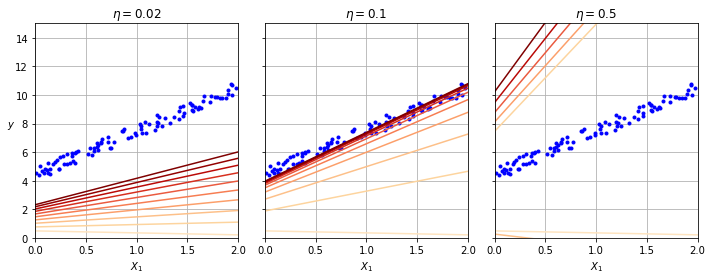

In [20]:
np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10,4))

# plt.subplot(231)
# plot_gradient_descent(theta, eta=0.02)
# plt.subplot(232)
# plot_gradient_descent(theta, eta=0.1)
# plt.subplot(233)
# plot_gradient_descent(theta, eta=0.5)
plt.subplot(131)
plot_gradient_descent_new(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd =plot_gradient_descent_new(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plot_gradient_descent_new(theta, eta=0.5)
plt.gca().axes.yaxis.set_ticklabels([])
save_fig("gradient_descent_plot")
plt.show()



### Stochastic Gradient Descent

In [21]:
theta_path_sgd = []
m= len(X_b)
np.random.seed(42)

In [22]:
T0, T1 = 5, 50 #Learning schedule hyperparameters
def learning_schedule(t):
    return T0/(t+T1)

Saving sgd_plot...


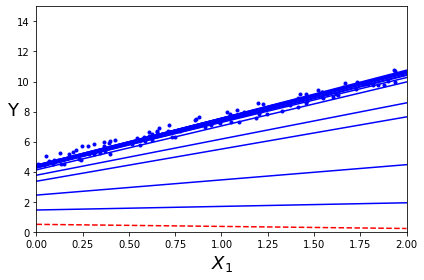

In [23]:


theta = np.random.randn(2,1)#random initialization
# we will plot the figure in the first n_show round of the 1st epoch
n_epoches = 50
n_show = 20
for epoch in range(n_epoches):
    for i in range(m):
        if epoch==0 and i< n_show:
            y_predict =   X_new_b@theta
            style ='b-' if i>0 else 'r--'
            plt.plot(X_new, y_predict,style)
        random_idx = np.random.randint(m)
        Xi = X_b[random_idx:random_idx+1]
        yi = y[random_idx:random_idx+1]
        gradients = 2*Xi.T@(Xi@theta -yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
        theta_path_sgd.append(theta)
        
plt.plot(X, y,'b.')
plt.axis([0,2,0,15])
plt.xlabel("$X_1$",fontsize=18)
plt.ylabel("Y", rotation=0,fontsize=18)
save_fig("sgd_plot")
plt.show()

In [24]:
X_new_b,theta

(array([[1., 0.],
        [1., 2.]]),
 array([[4.51548062],
        [2.9775157 ]]))

In [25]:
from sklearn.linear_model import SGDRegressor


In [26]:
sgd_reg = SGDRegressor(eta0=0.1, max_iter=1000, tol=1e-3, penalty=None, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [27]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.51603434]), array([3.00059188]))

### Mini-batch Gradient Descent

In [28]:
theta_path_mgd = []

n_epochs = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)
t=0

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0/(t+t1)
    
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) -yi)
        eta = learning_schedule(t)
        theta = theta - eta*gradients
        theta_path_mgd.append(theta)

In [29]:
# theta_path_mgd = []

# n_iterations = 50
# minibatch_size = 20

# np.random.seed(42)
# theta = np.random.randn(2,1)  # random initialization

# t0, t1 = 5, 50
# def learning_schedule(t):
#     return t0 / (t + t1)

# t = 0
# for epoch in range(n_iterations):
#     shuffled_indices = np.random.permutation(m)
#     X_b_shuffled = X_b[shuffled_indices]
#     y_shuffled = y[shuffled_indices]
#     for i in range(0, m, minibatch_size):
#         t += 1
#         xi = X_b_shuffled[i:i+minibatch_size]
#         yi = y_shuffled[i:i+minibatch_size]
#         gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
#         eta = learning_schedule(t)
#         theta = theta - eta * gradients
#         theta_path_mgd.append(theta)

In [30]:
theta

array([[4.52651397],
       [2.99723869]])

In [31]:

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)


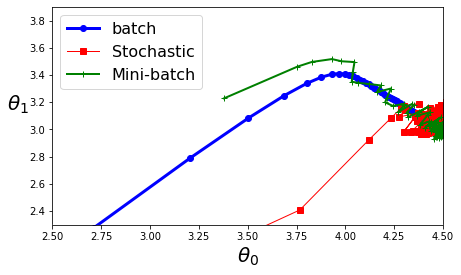

In [32]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_bgd[:,0],theta_path_bgd[:,1], "b-o", linewidth=3, label='batch' )
plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:,0],theta_path_mgd[:,1], "g-+", linewidth=2, label="Mini-batch" )
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

## Polynomial Regression


In [33]:
m = 100
X = 6 * np.random.rand(m,1) -3 #100 numbers that exists in (-3,3)
y = 0.5 * X**2 + X +2 + np.random.randn(m,1)


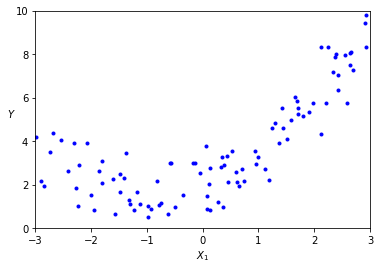

In [34]:
plt.plot(X, y, 'b.')
plt.axis([-3, 3, 0, 10])
plt.xlabel("$X_1$")
plt.ylabel("$Y$", rotation=0)
plt.show()

In [35]:
from sklearn.preprocessing import PolynomialFeatures


In [36]:
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([2.38942838]), array([2.38942838, 5.709368  ]))

In [37]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[0.95038538, 0.52577032]]), array([1.9735233]))

In [38]:
# create new X
X_new = np.linspace(-3,3,100).reshape(100,1)

In [39]:
X_new_poly = poly_features.transform(X_new)
y_poly_pred = lin_reg.predict(X_new_poly)

Saving quadratic_predictions_plot...


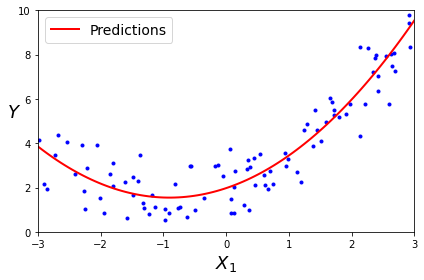

In [40]:
plt.plot(X,y, 'b.')
plt.plot(X_new, y_poly_pred, 'r-',linewidth=2, label = 'Predictions')
plt.legend(loc='upper left', fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$Y$", rotation=0, fontsize=18)
save_fig("quadratic_predictions_plot")
plt.show()

In [41]:
# High degree polynomial regression comparison
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Saving high_degree_polynomials_plot...


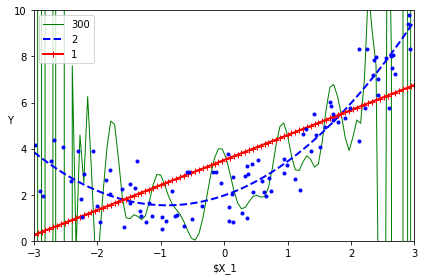

In [42]:
for style, degree, linewidth in (('g-',300, 1), ('b--', 2, 2),('r-+', 1, 2)):
    pipe = [
        ('poly',PolynomialFeatures(degree= degree, include_bias=False)),
        ('standard',StandardScaler()),
        ('lr',LinearRegression())
    ]

    lr_pipe = Pipeline(pipe)
    lr_pipe.fit(X, y)
    y_pred = lr_pipe.predict(X_new)
    plt.plot(X_new, y_pred, style, label= str(degree), linewidth=linewidth)
    
plt.plot(X, y, 'b.')    
plt.xlabel("$X_1")
plt.ylabel("Y", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

## Learning Curves

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [44]:
# plot_learning_curve is to compare the train set and validation set error while training set size is increased
def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
#     print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
        val_errors.append(mean_squared_error(y_val, y_val_pred))
    plt.plot(np.sqrt(train_errors),"r-+", linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label='val')
    plt.ylabel("RMSE", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    

Saving underfitting_learning_curves_plot...


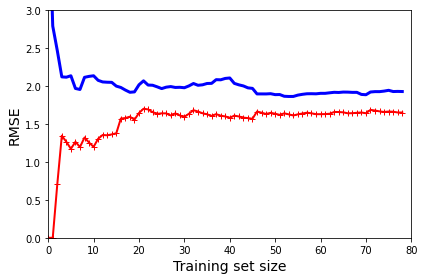

In [45]:
lin_reg= LinearRegression()
plot_learning_curve(lin_reg,X,y)
plt.axis([0, 80, 0, 3]) 
save_fig("underfitting_learning_curves_plot")
plt.show()

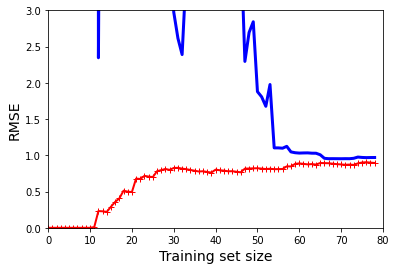

In [46]:
# try to imitate the overfitting
polynomial_regression = Pipeline([
    ("poly_feature", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])
plot_learning_curve(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

## regularized Linear Models

### Ridge regression(l2)

In [47]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m,1)
y = 1 + 0.5*X + np.random.randn(m,1)/1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)


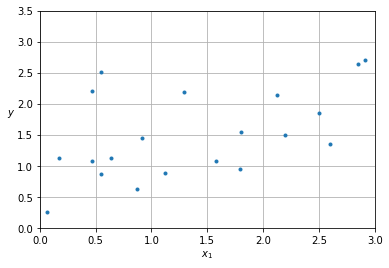

In [48]:
plt.plot(X,y,'.')
plt.axis([0, 3, 0,3.5])
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.grid()
plt.show()

In [49]:
from sklearn.linear_model import Ridge

In [50]:
ridge_reg = Ridge(alpha =0.1, solver='cholesky', random_state =42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

In [51]:
from sklearn.pipeline import make_pipeline

In [52]:
def plot_model(model_class, polynomial, alphas, **model_kwargs):
    """
    This function is to plot the model with differenct alpha.
    if alpha equals to zero, then we create the model, otherwise 
    we create tune the model with alphas 
    """
    plt.plot(X, y,'.', linewidth=3)
    for alpha, style in zip(alphas,("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
            PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model
            )
        model.fit(X,y)
        y_new_pred = model.predict(X_new)

        plt.plot(X_new, y_new_pred, style, label = fr"$\alpha={alpha}$"
                 , linewidth=2)
        plt.legend(loc="upper left")
        plt.xlabel("$X_1")
        plt.axis([0,3,0, 3.5])
        plt.grid()            
            

Saving ridge_regression_plot...


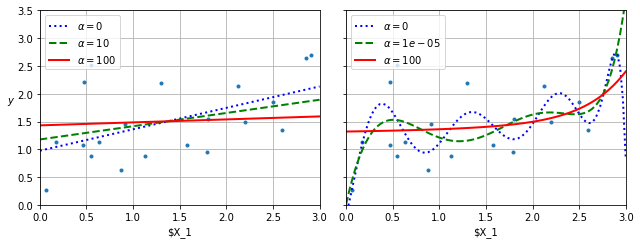

In [53]:
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True,alphas=(0, 1e-05, 100), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
save_fig('ridge_regression_plot')
plt.show()

In [54]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1/m, tol = None,
                      max_iter =1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel()) # y.ravel() because fit() expects 1D targets
sgd_reg.predict([[1.5]])

array([1.55302613])

In [55]:
# show that we get roughly the same solution as we use Stochastic Average GD (solver="sag")
ridge_reg = Ridge(alpha=0.1, solver='sag', random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55321535]])

In [56]:
# shows the closed form solution of Ridge regression,
#              compare with the Ridge model's learned parameters below
alpha = 0.1
A = np.array([[0,0], [0,1]])
X_b = np.c_[np.ones(m), X]
np.linalg.inv(X_b.T @ X_b + alpha * A) @ X_b.T @ y

array([[0.97898394],
       [0.3828496 ]])

In [57]:
ridge_reg.intercept_, ridge_reg.coef_

(array([0.97944909]), array([[0.38251084]]))

### Lasso Regression(l1)

In [59]:
from sklearn.linear_model import Lasso

In [65]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

Saving lasso_regression_plot...


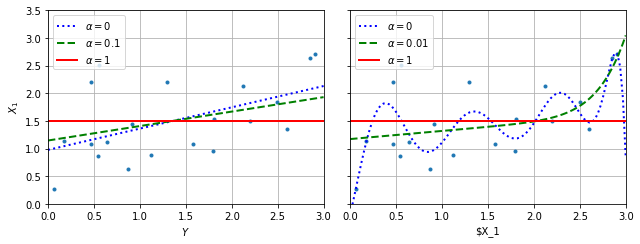

In [70]:
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$X_1$")
plt.xlabel("$Y$")
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
save_fig("lasso_regression_plot")
plt.show()

In [153]:
# Lasso versus Ridge regularization
t1a, t1b, t2a, t2b = -1, 3, -1.5,  1.5
t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s) #create grid matirx t1s*t2s
T= np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]
# cost function
J= 1/len(Xr)*(((T @ Xr.T -yr.T)**2).sum(axis=1)).reshape(t1.shape)


N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)
# find the smallest cost value index 
t_min_idx = np.unravel_index(J.argmin(),J.shape) 
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25],[-1]])

In [145]:
def bgd_path(theta, X, y,l1, l2, core=1,  eta =0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = (core *2) / len(X) * X.T @ (X@theta -y)+ l1*np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    
    return np.array(path)
            
        

Saving lasso_vs_ridge_plot...


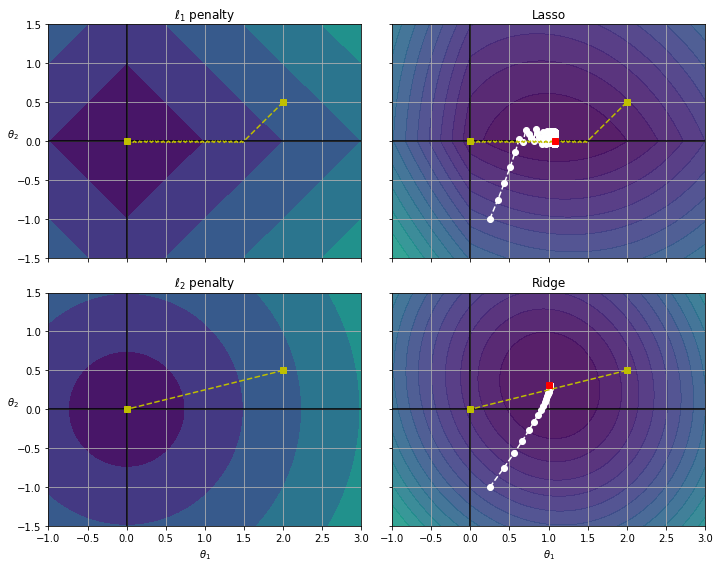

In [158]:
fig, axes = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10.1,8))

for i, N, l1, l2, title in ((0, N1, 2.0, 0, 'Lasso'), (1, N2, 0, 2.0, 'Ridge')):
    JR = J + l1 *N1 + l2*0.5*N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]
    
    levels= np.exp(np.linspace(0,1,20))-1
    levelsJ = levels * (J.max()-J.min()) + J.min()
    levelsJR = levels * (JR.max()-JR.min()) + JR.min()
    levelsN = np.linspace(0, N.max(),10)
    
    path_J = bgd_path(t_init, Xr, yr,l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr,l1, l2)
    path_N = bgd_path(theta= np.array([[2.0], [0.5]]), X = Xr, y=yr,
                     l1 = np.sign(l1)/3, l2=np.sign(l2), core=0)
    
    
    ax = axes[i,0]
    ax.grid()
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N/2.0, levels =levelsN)
    ax.plot(path_N[:,0], path_N[:,1], "y--")
    ax.plot(0,0, 'ys')
    ax.plot(t1_min, t2_min, 'ys')
    ax.set_title(fr"$\ell_{i+1}$ penalty")
    ax.axis([t1a, t1b, t2a, t2b])
    if i==1:
        ax.set_xlabel(r"$\theta_1$")
    ax.set_ylabel(r"$\theta_2$", rotation=0)
    
    ax = axes[i,1]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:,0], path_JR[:,1], "w--o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0,0 ,'ys')
    ax.plot(t1_min, t2_min ,'ys')
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")
        
save_fig("lasso_vs_ridge_plot")
plt.show()      

### Elastic Net

In [159]:
from sklearn.linear_model import ElasticNet

In [161]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])

### Early stopping

In [162]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [208]:
# create the data set again
np.random.seed(42)
m = 100
X= 6*np.random.rand(m,1)-3

y= 0.5 * X**2 + X +2 + np.random.randn(m,1)
X_train, X_valid = X[:m//2], X[m//2:]
y_train, y_valid = y[:m//2,0], y[m//2:, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                             StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)

sgd_reg = SGDRegressor(  penalty = None, 
                      eta0=0.002, random_state =42)

n_epoches = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []


Saving early_stopping_plot...


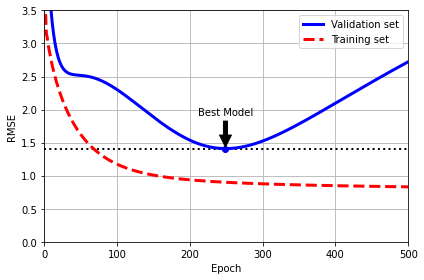

In [226]:
for epoch in range(n_epoches):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_pred = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_pred, squared=False)

    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)
        
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = mean_squared_error(y_train, y_train_predict, squared=False)
    train_errors.append(train_error)
    val_errors.append(val_error)

best_score = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.plot([0, n_epoches], [best_valid_rmse, best_valid_rmse],'k:', linewidth=2)
plt.annotate(text='Best Model', xy= (best_score, best_valid_rmse),
            xytext= (best_score, best_valid_rmse+0.5),
            ha ='center',
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot(val_errors,'b', linewidth=3,label="Validation set")
plt.plot(train_errors,'r--', linewidth=3, label="Training set")
plt.plot(best_score, best_valid_rmse, 'bo')
plt.axis([0, n_epoches, 0, 3.5])
plt.legend(loc ='upper right')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.grid()
save_fig("early_stopping_plot")
plt.show()

## Logistic Regression

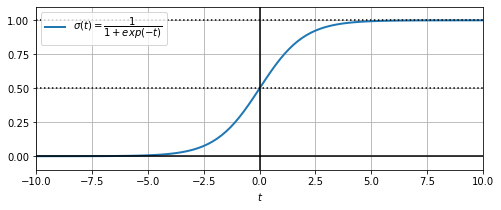

In [246]:
limit = 10
X = np.linspace(-limit,limit,100)
sigmoid = 1 / (1+ np.exp(-X))

plt.figure(figsize =(8,3))
plt.plot(X,sigmoid, linewidth=2, label =r"$\sigma(t) = \dfrac{1}{1+exp(-t)}$")
plt.axis([-10, 10,-0.1,1.1])
plt.plot([-limit, limit], [0.5, 0.5], 'k:')
plt.plot([-limit, limit], [1, 1], 'k:')
plt.plot([0,0], [-0.1,1.1], 'k')
plt.plot([-limit, limit], [0, 0], "k-")
plt.xlabel(f"$t$")
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1.0])
plt.legend(loc='upper left')
plt.grid()
save_fig("logistic_function_plot")
plt.show()
            

### Decision boundary

In [247]:
from sklearn import datasets 

In [253]:
iris = datasets.load_iris(as_frame=True)
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [254]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [255]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [256]:
iris.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [258]:
iris.target_names, iris.feature_names

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [273]:
# detect the Iris verginica type based only on petal width
X= iris.data[['petal width (cm)']].values
y = iris.target_names[iris.target] == 'virginica'

In [264]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# petal width range [0.1, 2.5], plot a map to cover all these range and check the predict perfomance

X_new = np.linspace(0,3, 1000).reshape(-1,1)
y_new = log_reg.predict_proba(X_new)

In [288]:
# decision boundary is the 1st point that petal width's prob is great equal than 0.5
decision_boundary = X_new[y_new[:,1]>=0.5][0,0]

Saving logistic_regression_plot...


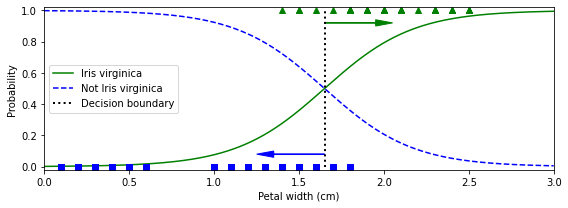

In [305]:
plt.figure(figsize=(8,3))
plt.plot(X_new, y_new[:,1],'g-', label="Iris virginica")
plt.plot(X_new, y_new[:,0],'b--', label="Not Iris virginica")
plt.plot([decision_boundary, decision_boundary],[0, 1], 'k:', linewidth=2,
         label="Decision boundary")
plt.legend(loc ="center left")
plt.axis([0,3, -0.02,1.02])


# indicate (not) iris virginica petal width
plt.plot(X_train[y_train==0],y_train[y_train==0], 'bs')
plt.plot(X_train[y_train==1],y_train[y_train==1], 'g^')
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0, fc='b',ec='b',head_width=0.04, head_length =0.1)
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0, fc='g', ec='g', head_width=0.04, head_length =0.1)
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
save_fig("logistic_regression_plot")
plt.show()

In [306]:
decision_boundary

1.6516516516516517

In [311]:
log_reg.predict([[1.5], [1.7]])

array([False,  True])

In [314]:
# using petal width and length to predict
X = iris.data[['petal length (cm)','petal width (cm)']].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
log_reg_new = LogisticRegression(random_state=42)
log_reg_new.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [ ]:
# petal length range is between 1 and 7
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
y2_new = log_reg_new.predict_proba(X_new)
zz = y2_new[:,1].reshape(x0.shape)

Saving logistic_regression_contour_plot...


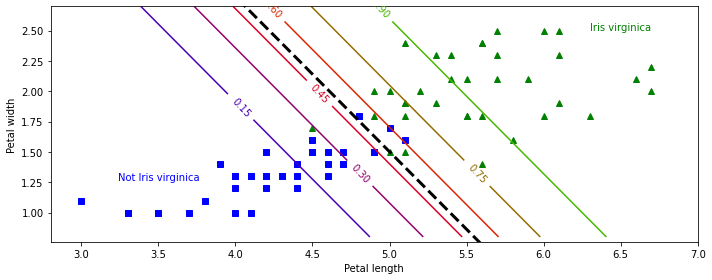

In [390]:
# decision_boundary_0.
plt.figure(figsize=(10,4))
plt.plot(X_train[y_train>=0.5,0],X_train[y_train>=0.5,1],'g^')
plt.plot(X_train[y_train<0.5,0],X_train[y_train<0.5,1],'bs')
plt.axis([2.8, 7, 0.76, 2.7])


contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)

left_right = np.array([2.8, 7])
boundary = -((log_reg_new.coef_[0,0]*left_right + log_reg_new.intercept_[0])
           / log_reg_new.coef_[0,1])
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.5, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
save_fig("logistic_regression_contour_plot")
plt.show()

### Softmax Regression


In [394]:
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris.target

In [395]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
softmax_reg = LogisticRegression(C=30, random_state = 42)
softmax_reg.fit(X_train, y_train)
softmax_reg.predict([[5,2]])

array([2])

In [397]:
softmax_reg.predict_proba([[5,2]]).round(2)

array([[0.  , 0.04, 0.96]])

In [425]:
from matplotlib.colors import ListedColormap


In [423]:
x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1,1),
                    np.linspace(0,3.5, 200).reshape(-1,1))
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = softmax_reg.predict_proba(X_new)
y_pred = softmax_reg.predict(X_new)

Saving softmax_regression_contour_plot...


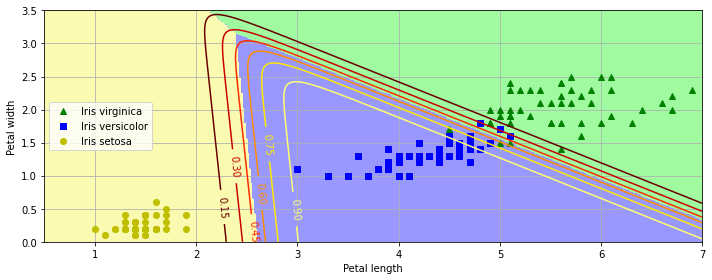

In [439]:
custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])


zz1 = y_proba[:,1].reshape(x0.shape)
zz = y_pred.reshape(x0.shape)


plt.figure(figsize=(10, 4))
plt.plot(X[y==2,0], X[y==2,1], 'g^', label = "Iris virginica")
plt.plot(X[y==1,0], X[y==1,1], 'bs', label = "Iris versicolor")
plt.plot(X[y==0,0], X[y==0,1], 'yo', label = "Iris setosa")


plt.contourf(x0,x1,zz, cmap= custom_cmap) #plot filled contours
contour = plt.contour(x0, x1, zz1, cmap = "hot") #plot the contour
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
plt.legend(loc="center left")
save_fig("softmax_regression_contour_plot")
plt.show()


Saving softmax_regression_contour_plot...


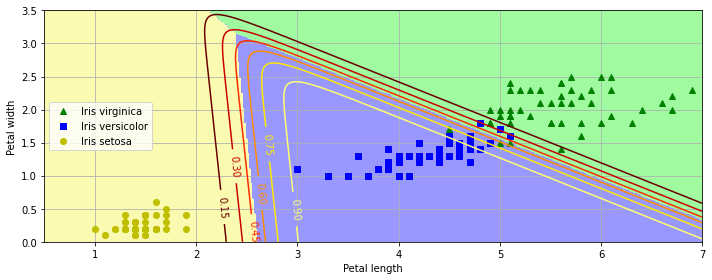

array([0, 0, 0, ..., 2, 2, 2])